## HumanActivityRecognition
This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.



Train and test data were saperated


The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data

Problem Framework 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data. Each datapoint corresponds one of the 6 Activities.

# Obtaining the train data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None)


X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,subject,Activity,ActivityName
4465,0.28675,-0.017545,-0.108847,-0.991884,-0.979522,-0.991844,-0.992558,-0.979419,-0.990939,-0.932229,...,0.020008,-0.175049,0.51051,0.291986,0.466209,-0.472328,-0.524693,22,6,LAYING


In [4]:
print(train.shape,train.size)


(7352, 564) 4146528


# Obtaining the test data

In [5]:

X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None)


X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)


y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})


test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,subject,Activity,ActivityName
1744,0.279271,-0.014534,-0.110841,-0.997711,-0.965335,-0.988346,-0.997955,-0.963407,-0.989884,-0.942764,...,-0.15319,-0.136304,0.035011,-0.25903,-0.928751,0.052146,-0.009135,13,4,SITTING


In [6]:
print(test.shape,test.size)

(2947, 564) 1662108


In [29]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

In [11]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [12]:
train.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 554,Unnamed: 555,Unnamed: 556,Unnamed: 557,Unnamed: 558,Unnamed: 559,Unnamed: 560,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


## 1. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.family'] = 'Times New Roman'

## 3. Check for data imbalance

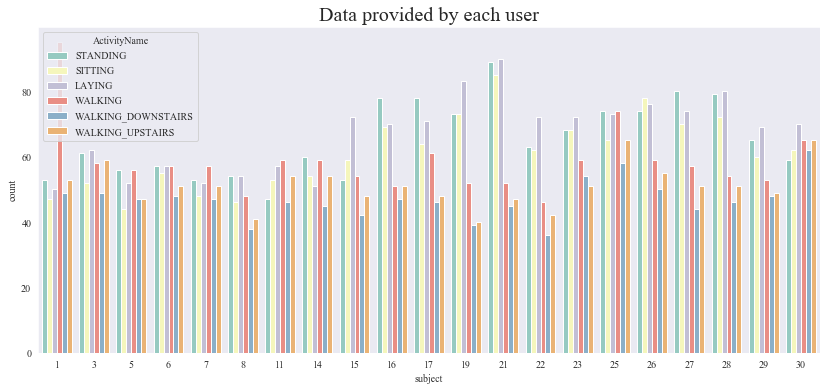

In [24]:
plt.figure(figsize=(14,6))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

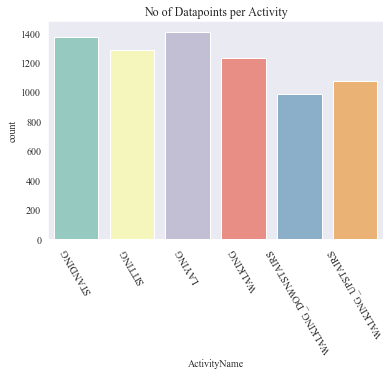

In [28]:
plt.title('No of Datapoints per Activity')
sns.countplot(x=train.ActivityName)
plt.xticks(rotation=120)
plt.show()

# LSTM MODEL FOR THE HAR PROBLEM

In [26]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])